# In a separate tab, Download the Kaggle API Token file from kaggle.com

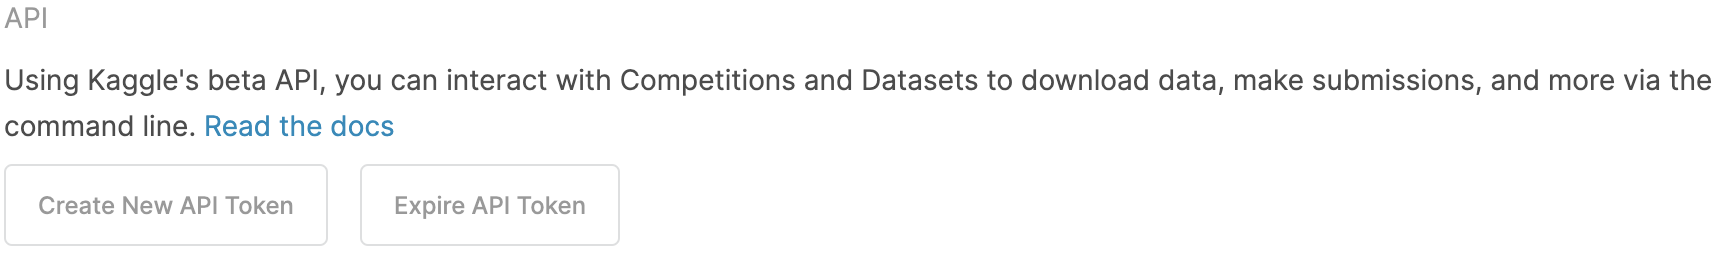

In [ ]:
# This will allow you to choose the kaggle.json file you downloaded for upload
# from google.colab import files
# files.upload()

# KAGGLE_KEY_PATH = 'kaggle.json'
KAGGLE_KEY_PATH = '~/Downloads/kaggle.json'

!pip install -q kaggle # Ensure latest kaggle cli
# Move the file to the correct directory for the kaggle cli to find
!mkdir ~/.kaggle
!mv $KAGGLE_KEY_PATH ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge

In [ ]:
!unzip -q CORD-19-research-challenge.zip -d data

In [1]:
from pathlib import Path
import json
from pprint import pprint as pp
from itertools import chain

import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
pd.read_csv("data/metadata.csv").head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [8]:
print(Path().cwd() / 'data')
json_files = list((Path().cwd() / 'data').glob('**/*.json'))

def load_paper(f):
    with f.open() as fp:
        d = json.load(fp)
        try:
            title = "# " + d['metadata']['title']
            abstract = (a['text'] for a in d['abstract'])
            body = (a['text'] for a in d['body_text'])
            ret = '\n\n'.join(chain([title], abstract, body))
        except:
            ret = None
        return ret

def check_abstracts(f):
    with f.open() as fp:
        d = json.load(fp)
        return bool(d['abstract'])

# %time titles = [load_paper(f) for f in json_files]
def run_parallel(func):
    return Parallel(n_jobs=32)(delayed(func)(f) for f in json_files)

# %time papers = run_parallel(load_paper)
%time papers = run_parallel(check_abstracts)

len([t for t in papers if t is None])

/Users/david/Projects/covid-challenge/COVID-19-challenge/data
CPU times: user 7.9 s, sys: 1.06 s, total: 8.96 s
Wall time: 12.1 s


0

In [13]:
len([t for t in papers if t])
len([t for t in papers if not t])

8051

In [9]:
# Check to see how many documents have no title
sns.distplot([len(t) for t in papers])

TypeError: object of type 'bool' has no len()

In [6]:
print(papers[1])

International aviation emissions to 2025: Can emissions be stabilised without restricting demand?

International aviation is growing rapidly, resulting in rising aviation greenhouse gas emissions. Concerns about the growth trajectory of the industry and emissions have led to calls for market measures such as emissions trading and carbon levies to be introduced to restrict demand and prompt innovation. This paper provides an overview of the science on aviation's contribution to climate change, analyses key trends in the industry since 1990, projects international civil aviation emissions to 2025 and analyses the emission intensity improvements that are necessary to offset rising international demand. The findings suggest international aviation carbon dioxide (CO 2 ) emissions will increase by more than 110 per cent between 2005 and 2025 (from 416 Mt to between 876 and 1013 Mt) and that it is unlikely emissions could be stabilised at levels consistent with risk averse climate targets wit

In [7]:
len([t for t in papers if t is None])

0